In [2]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/helpers.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/utils.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/models.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/data_augmentation.py /content

Mounted at /content/drive


In [3]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from utils import *
from helpers import *
from models import *
from data_augmentation import *


In [5]:
# Loaded a set of images
root_dir = "/content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/"
image_dir = root_dir + "images/"
gt_dir = root_dir + "groundtruth/"

imgs = extract_data_for_unet(image_dir, 100)
gt_imgs = extract_labels_for_unet(gt_dir, 100)

Loaded 100 images.
Loaded 100 groundtruth images.
Shape of GT images :  (100, 400, 400)


In [6]:
satellite_images = load_images_from_folder('/content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images')
groundtruth_images = load_images_from_folder('/content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/groundtruth', is_gray=True)

# Perform augmentation
aug_imgs, aug_gts = augment_images_no_save(satellite_images, groundtruth_images)
aug_gts = one_hot(aug_gts)

100
100


In [7]:
print(aug_imgs.shape)
print(aug_gts.shape)

(1200, 400, 400, 3)
(1200, 400, 400, 2)


In [8]:
all_imgs = np.append(imgs, aug_imgs, axis=0)
all_gts = np.append(gt_imgs, aug_gts, axis=0)

In [9]:
print(all_imgs.shape)
print(all_gts.shape)

(1300, 400, 400, 3)
(1300, 400, 400, 2)


In [10]:
x_tr, x_te, y_tr, y_te = split_data(all_imgs, all_gts, 0.85)

In [38]:
model_small = build_unet(start_filter=32, num_stages= 4,dropout = 0.1, activation='relu', regularization=1e-8)
model_small.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_small = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_small', save_weights_only=True, verbose=1)]
history_small = model_small.fit(x_tr, y_tr, batch_size=2, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_small])

Epoch 1/200
553/553 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.8572
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_small
553/553 [==============================] - 42s 57ms/step - loss: 0.1471 - accuracy: 0.8572 - val_loss: 0.1639 - val_accuracy: 0.8364
Epoch 2/200
553/553 [==============================] - ETA: 0s - loss: 0.0999 - accuracy: 0.9006
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_small
553/553 [==============================] - 28s 50ms/step - loss: 0.0999 - accuracy: 0.9006 - val_loss: 0.0925 - val_accuracy: 0.9077
Epoch 3/200
552/553 [============================>.] - ETA: 0s - loss: 0.0826 - accuracy: 0.9177
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_small
553/553 [==============================] - 28s 50ms/step - loss: 0.0827 - accuracy: 0.9176 - val_loss: 0.1304 - val_accuracy: 0.8698
Epoch 4/200
552/553 [=============

In [39]:
train_f1=evaluating_model_f1(x_tr, y_tr, model_small)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, model_small)
print("the validating f1 score is:", validate_f1)

35/35 [==============================] - 8s 222ms/step
the training f1 score is:  0.9685342626223664
7/7 [==============================] - 1s 132ms/step
the validating f1 score is: 0.8996523184150238


1/1 [==============================] - 0s 19ms/step


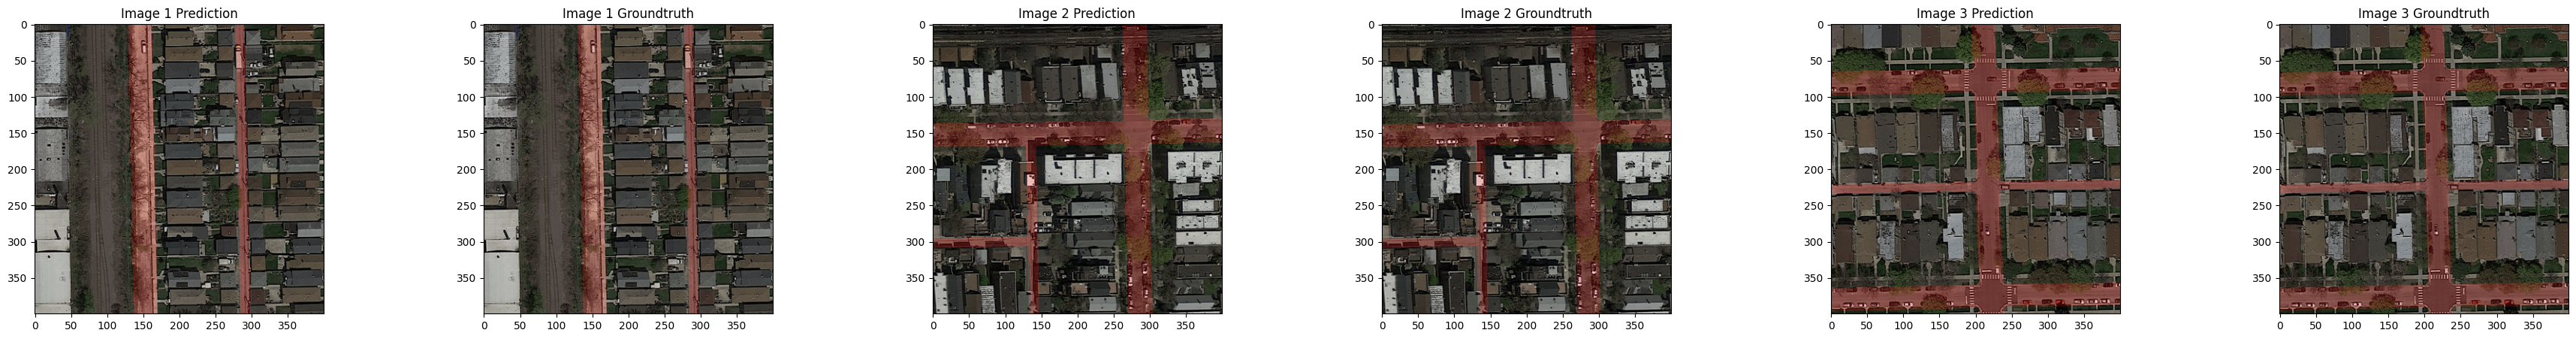

In [40]:
my_show_predictions1(model_small, 3)

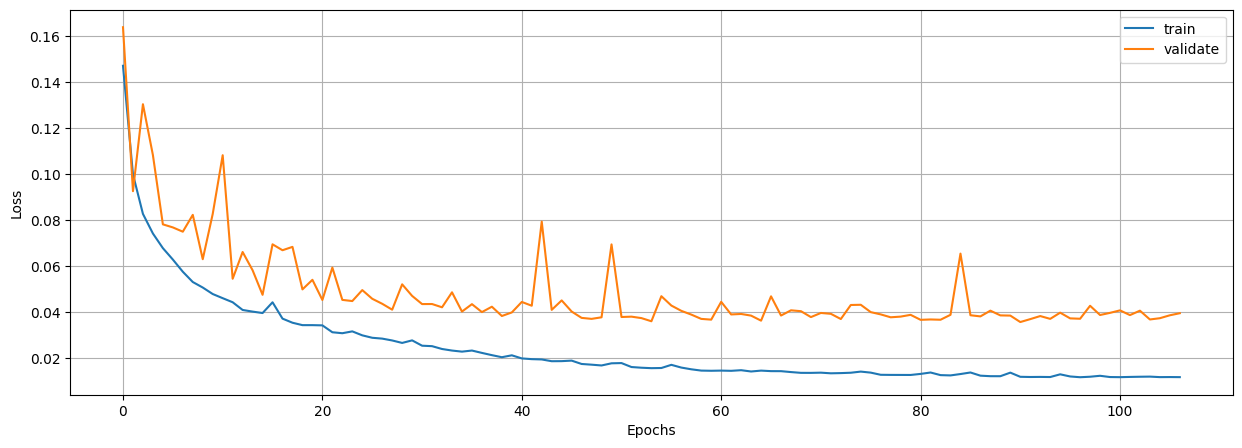

In [41]:
plt.figure(figsize=(15, 5))

plt.plot(history_small.history['loss'])
plt.plot(history_small.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

In [51]:
modelA32RD = build_unet(dropout = 0.1, activation='relu', regularization=1e-6)
modelA32RD.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_A32RD = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_A32RDv2', save_weights_only=True, verbose=1)]
history_A32R = modelA32RD.fit(x_tr, y_tr, batch_size=4, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_A32RD])


Epoch 1/200
552/553 [============================>.] - ETA: 0s - loss: 0.1772 - accuracy: 0.8654
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_A32RD
553/553 [==============================] - 38s 54ms/step - loss: 0.1772 - accuracy: 0.8654 - val_loss: 0.2090 - val_accuracy: 0.8203
Epoch 2/200
552/553 [============================>.] - ETA: 0s - loss: 0.1213 - accuracy: 0.9053
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_A32RD
553/553 [==============================] - 28s 51ms/step - loss: 0.1212 - accuracy: 0.9053 - val_loss: 0.1495 - val_accuracy: 0.8752
Epoch 3/200
553/553 [==============================] - ETA: 0s - loss: 0.1090 - accuracy: 0.9147
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_A32RD
553/553 [==============================] - 28s 51ms/step - loss: 0.1090 - accuracy: 0.9147 - val_loss: 0.1319 - val_accuracy: 0.8914
Epoch 4/200
553/553 [=============

In [52]:
train_f1=evaluating_model_f1(x_tr, y_tr, modelA32RD)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, modelA32RD)
print("the validating f1 score is:", validate_f1)

35/35 [==============================] - 5s 128ms/step
the training f1 score is:  0.9043185361447243
7/7 [==============================] - 1s 129ms/step
the validating f1 score is: 0.8697256492565939


In [ ]:
my_show_predictions1(modelA32RD, 3)

In [1]:
plt.figure(figsize=(15, 5))

plt.plot(history_A32RD.history['loss'])
plt.plot(history_A32RD.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

NameError: ignored

In [ ]:
modelA64RD = build_unet(start_filter=64, num_stages= 4,dropout = 0.1, activation='relu', regularization=1e-8)
modelA64RD.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_A64RD = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RD', save_weights_only=True, verbose=1)]
history_A64RDs = modelA64RD.fit(x_tr, y_tr, batch_size=4, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_A64RD])

Epoch 1/200
277/277 [==============================] - ETA: 0s - loss: 0.1501 - accuracy: 0.8543
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RD
277/277 [==============================] - 274s 863ms/step - loss: 0.1501 - accuracy: 0.8543 - val_loss: 0.2027 - val_accuracy: 0.7976
Epoch 2/200
277/277 [==============================] - ETA: 0s - loss: 0.1018 - accuracy: 0.8986
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RD
277/277 [==============================] - 224s 810ms/step - loss: 0.1018 - accuracy: 0.8986 - val_loss: 0.1797 - val_accuracy: 0.8205
Epoch 3/200
277/277 [==============================] - ETA: 0s - loss: 0.0882 - accuracy: 0.9121
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RD
277/277 [==============================] - 224s 809ms/step - loss: 0.0882 - accuracy: 0.9121 - val_loss: 0.1015 - val_accuracy: 0.8987
Epoch 4/200
277/277 [==========

In [ ]:
train_f1=evaluating_model_f1(x_tr, y_tr, modelA64RD)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, modelA64RD)
print("the validating f1 score is:", validate_f1)

In [ ]:
my_show_predictions1(modelA64RD, 3)

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(history_A64RD.history['loss'])
plt.plot(history_A64RD.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

In [58]:
modelA64RD_5s = build_unet(start_filter=32, num_stages= 5,dropout = 0.2, activation='relu', regularization=1e-7)
modelA64RD_5s.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_A64RD_5s = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RD_5s', save_weights_only=True, verbose=1)]
history_A64RD_5s = modelA64RD_5s.fit(x_tr, y_tr, batch_size=8, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_A64RD_5s])

InternalError: ignored

In [ ]:
train_f1=evaluating_model_f1(x_tr, y_tr, modelA64RD_5s)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, modelA64RD_5s)
print("the validating f1 score is:", validate_f1)

In [ ]:
my_show_predictions1(modelA64RD_5s, 3)

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(history_A64RD.history['loss'])
plt.plot(history_A64RD.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()